# 1. Importing packages

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# 2. Splitting Data into Train and Test 

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


https://keras.io/backend/

In [0]:
#As Tensorflow uses channels_last so it will run the"else" part of the loop 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

# 3.Normalizing Data

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 4. One hot encoding of target feature

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [10]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# 5. Building different CNN architectures

#### Function for plotting error plots

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# 5.1. Architecture 1

In [12]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   


In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

a = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 158us/step - loss: 0.0649 - acc: 0.9810 - val_loss: 0.0341 - val_acc: 0.9884
Epoch 2/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0525 - acc: 0.9841 - val_loss: 0.0297 - val_acc: 0.9893
Epoch 3/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0289 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0390 - acc: 0.9882 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 5/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0368 - acc: 0.9885 - val_loss: 0.0263 - val_acc: 0.9912
Epoch 6/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0345 - acc: 0.9892 - val_loss: 0.0283 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0317 - acc: 0.9905 - val_loss: 0.0247 -

Train score: 0.0058519107314346985
Train accuracy: 0.9982833333333333
#############################################
Test score: 0.028024299745546342
Test accuracy: 0.992


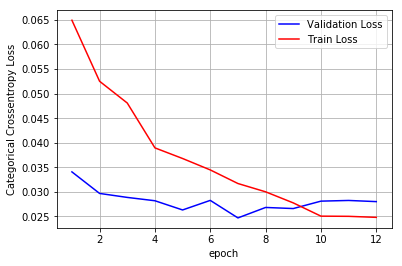

In [15]:
%matplotlib inline 
score1 = model.evaluate(x_train, y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = a.history['val_loss']
ty = a.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5.2. Architecture 2

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 20, 16)        3216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               192120    
_________________________________________________________________
dense_13 (Dense)             (None, 84)                10164     
_________________________________________________________________
dropout_8 (Dropout)          (None, 84)               

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [0]:
epochs1 = 5 
a = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs1,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.2812 - acc: 0.9140 - val_loss: 0.0821 - val_acc: 0.9741
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.0770 - acc: 0.9774 - val_loss: 0.0568 - val_acc: 0.9822
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.0522 - acc: 0.9841 - val_loss: 0.0369 - val_acc: 0.9873
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0402 - acc: 0.9876 - val_loss: 0.0383 - val_acc: 0.9873
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0380 - val_acc: 0.9872


Train score: 0.022948701379649963
Train accuracy: 0.99275
#############################################
Test score: 0.037955300857852856
Test accuracy: 0.9872


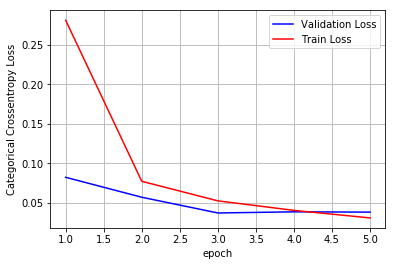

In [0]:
%matplotlib inline 
score1 = model.evaluate(x_train, y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs1+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = a.history['val_loss']
ty = a.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5.3. Architecture 3

In [0]:

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(50, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(60, (2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


          
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()




Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 50)        12850     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 50)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 50)        

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])


In [0]:
epochs2 = 10
a = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs2,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0607 - acc: 0.9827 - val_loss: 0.0415 - val_acc: 0.9875
Epoch 2/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0524 - acc: 0.9856 - val_loss: 0.0357 - val_acc: 0.9902
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0468 - acc: 0.9873 - val_loss: 0.0315 - val_acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0406 - acc: 0.9886 - val_loss: 0.0299 - val_acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0392 - acc: 0.9886 - val_loss: 0.0347 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0363 - acc: 0.9896 - val_loss: 0.0263 - val_acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0323 - acc: 0.9909 - val_loss: 0.

Train score: 0.01039956676193868
Train accuracy: 0.9969
#############################################
Test score: 0.02921236282427808
Test accuracy: 0.9927


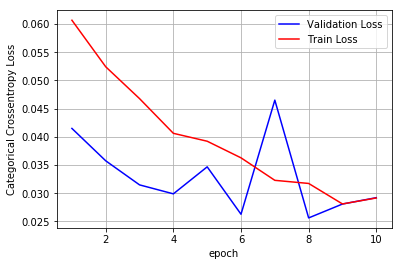

In [0]:
%matplotlib inline 
score1 = model.evaluate(x_train, y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs2+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = a.history['val_loss']
ty = a.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5.4. Architecture 4

In [0]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(60, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(70, (6, 6), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(80, (6, 6), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(85, (6, 6), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(90, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 23, 23, 50)        1850      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 18, 18, 60)        108060    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 9, 60)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 9, 9, 60)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 9, 9, 70)          151270    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 70)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 70)        

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(),
              metrics=['accuracy'])


In [0]:
epochs3 = 10
a = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs3,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.2338 - acc: 0.9316 - val_loss: 0.0797 - val_acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0692 - acc: 0.9821 - val_loss: 0.0571 - val_acc: 0.9857
Epoch 3/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0545 - acc: 0.9862 - val_loss: 0.0435 - val_acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0489 - acc: 0.9883 - val_loss: 0.0534 - val_acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0428 - acc: 0.9901 - val_loss: 0.0435 - val_acc: 0.9926
Epoch 6/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0380 - acc: 0.9914 - val_loss: 0.0493 - val_acc: 0.9891
Epoch 7/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0364 - acc: 0.9915 - val_loss: 0.

Train score: 0.014001991421726733
Train accuracy: 0.9965333333333334
#############################################
Test score: 0.04084050936136118
Test accuracy: 0.9916


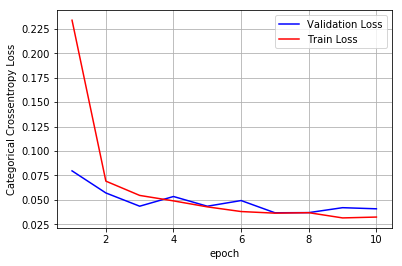

In [0]:
%matplotlib inline 
score1 = model.evaluate(x_train, y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs3+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = a.history['val_loss']
ty = a.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5.5. Architecture 5

Architecture 3 with epoch 4

In [0]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(60, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(70, (6, 6), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(80, (6, 6), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(85, (6, 6), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(90, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 23, 23, 50)        1850      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 18, 18, 60)        108060    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 9, 9, 60)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 9, 9, 60)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 9, 9, 70)          151270    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 70)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 70)        

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(),
              metrics=['accuracy'])
epochs4 = 4
a = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs4,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 17s 285us/step - loss: 0.2547 - acc: 0.9246 - val_loss: 0.1875 - val_acc: 0.9656
Epoch 2/4
60000/60000 [==============================] - 15s 253us/step - loss: 0.0719 - acc: 0.9815 - val_loss: 0.0595 - val_acc: 0.9871
Epoch 3/4
60000/60000 [==============================] - 16s 259us/step - loss: 0.0567 - acc: 0.9859 - val_loss: 0.0657 - val_acc: 0.9854
Epoch 4/4
60000/60000 [==============================] - 15s 255us/step - loss: 0.0459 - acc: 0.9888 - val_loss: 0.0392 - val_acc: 0.9904


Train score: 0.03082377031972772
Train accuracy: 0.99295
#############################################
Test score: 0.03924712953594576
Test accuracy: 0.9904


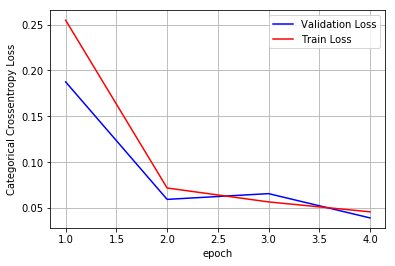

In [0]:
%matplotlib inline 
score1 = model.evaluate(x_train, y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs4+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = a.history['val_loss']
ty = a.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5.6. Architecture 6

In [0]:
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(40, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(50, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(60, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(70, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(80, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(90, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 24, 24, 40)        10840     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 12, 12, 40)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 12, 12, 40)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 12, 12, 50)        18050     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 6, 6, 50)          0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 6, 6, 50)        

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(),
              metrics=['accuracy'])
epochs5 = 5
a = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs5,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 339us/step - loss: 0.4664 - acc: 0.8565 - val_loss: 0.0756 - val_acc: 0.9804
Epoch 2/5
60000/60000 [==============================] - 14s 235us/step - loss: 0.1150 - acc: 0.9704 - val_loss: 0.0594 - val_acc: 0.9860
Epoch 3/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.0908 - acc: 0.9776 - val_loss: 0.0455 - val_acc: 0.9884
Epoch 4/5
60000/60000 [==============================] - 14s 233us/step - loss: 0.0757 - acc: 0.9816 - val_loss: 0.0388 - val_acc: 0.9900
Epoch 5/5
60000/60000 [==============================] - 14s 236us/step - loss: 0.0688 - acc: 0.9830 - val_loss: 0.0551 - val_acc: 0.9875


Train score: 0.043656497059857385
Train accuracy: 0.9891333333333333
#############################################
Test score: 0.05505621771432245
Test accuracy: 0.9875


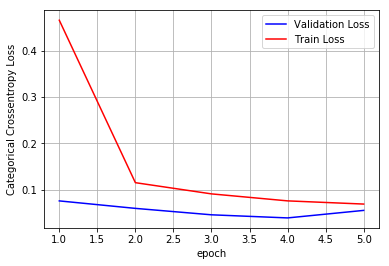

In [0]:
%matplotlib inline 
score1 = model.evaluate(x_train, y_train, verbose=0) 
print('Train score:', score1[0]) 
print('Train accuracy:', score1[1])
print("#############################################")
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs5+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = a.history['val_loss']
ty = a.history['loss']
plt_dynamic(x, vy, ty, ax)

# 6. Conclusion

In [3]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()

x.field_names = ["Model", "Number of epochs", "Train Accuracy","Test Accuracy"]

x.add_row(["Architecture 1",12,0.9982,0.992])
x.add_row(["Architecture 2",5,0.9927,0.9872])
x.add_row(["Architecture 3",10,0.9969,0.9927])
x.add_row(["Architecture 4",10,0.9965,0.9916])
x.add_row(["Architecture 5",4,0.9929,0.9904])
x.add_row(["Architecture 6",5,0.9891,0.9875])

print(x)




+----------------+------------------+----------------+---------------+
|     Model      | Number of epochs | Train Accuracy | Test Accuracy |
+----------------+------------------+----------------+---------------+
| Architecture 1 |        12        |     0.9982     |     0.992     |
| Architecture 2 |        5         |     0.9927     |     0.9872    |
| Architecture 3 |        10        |     0.9969     |     0.9927    |
| Architecture 4 |        10        |     0.9965     |     0.9916    |
| Architecture 5 |        4         |     0.9929     |     0.9904    |
| Architecture 6 |        5         |     0.9891     |     0.9875    |
+----------------+------------------+----------------+---------------+
